In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

# Problem 1

1. $$ \mathcal{L} = \sum_{i = 1}^l \left(y_i - \check{y}\right)^2 \rightarrow \min_{\breve{y}} $$
$$ \mathcal{L}_{\check{y}}' = 2 \sum_{i = 1}^l \left(\check{y}^* - y_i\right) = 2 l \check{y}^* - 2 \sum_{i = 1}^l y_i = 0 $$
$$ \check{y}^* = \frac{1}{l} \sum_{i = 1}^l y_i $$

2. $$ g_\mathbf{w}(x) = w_0 + w_1 x^1 + w_2 x^2 + \dots + w_m x^m $$
$$ \bar{x} = \frac{1}{N} e^T X, \: \bar{y} = \frac{1}{N} e^T Y, \: e = (1, 1, \dots, 1)^T $$
$$ X^T X w^* = X^T Y, \: X w^* = Y \: \Rightarrow \: X (X^T X)^{-1} X^T Y = X w^* = Y $$
$$ \frac{1}{N} e^T X (X^T X)^{-1} X^T Y = \frac{1}{N} e^T Y \: \Rightarrow \: \bar{x} w^* = \bar{y} $$

In [2]:
df = sns.load_dataset('anscombe')

df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f"Dataset {dataset}:")
    subset = df[df['dataset'] == dataset]
    print(f"Variance of x: {subset['x'].var()}")
    print(f"Variance of y: {subset['y'].var()}")
    print(f"Pearson correlation coefficient: {subset['x'].corr(subset['y'])}")
    print()

Dataset I:
Variance of x: 11.0
Variance of y: 4.127269090909091
Pearson correlation coefficient: 0.81642051634484

Dataset II:
Variance of x: 11.0
Variance of y: 4.127629090909091
Pearson correlation coefficient: 0.8162365060002428

Dataset III:
Variance of x: 11.0
Variance of y: 4.12262
Pearson correlation coefficient: 0.8162867394895984

Dataset IV:
Variance of x: 11.0
Variance of y: 4.123249090909091
Pearson correlation coefficient: 0.8165214368885028



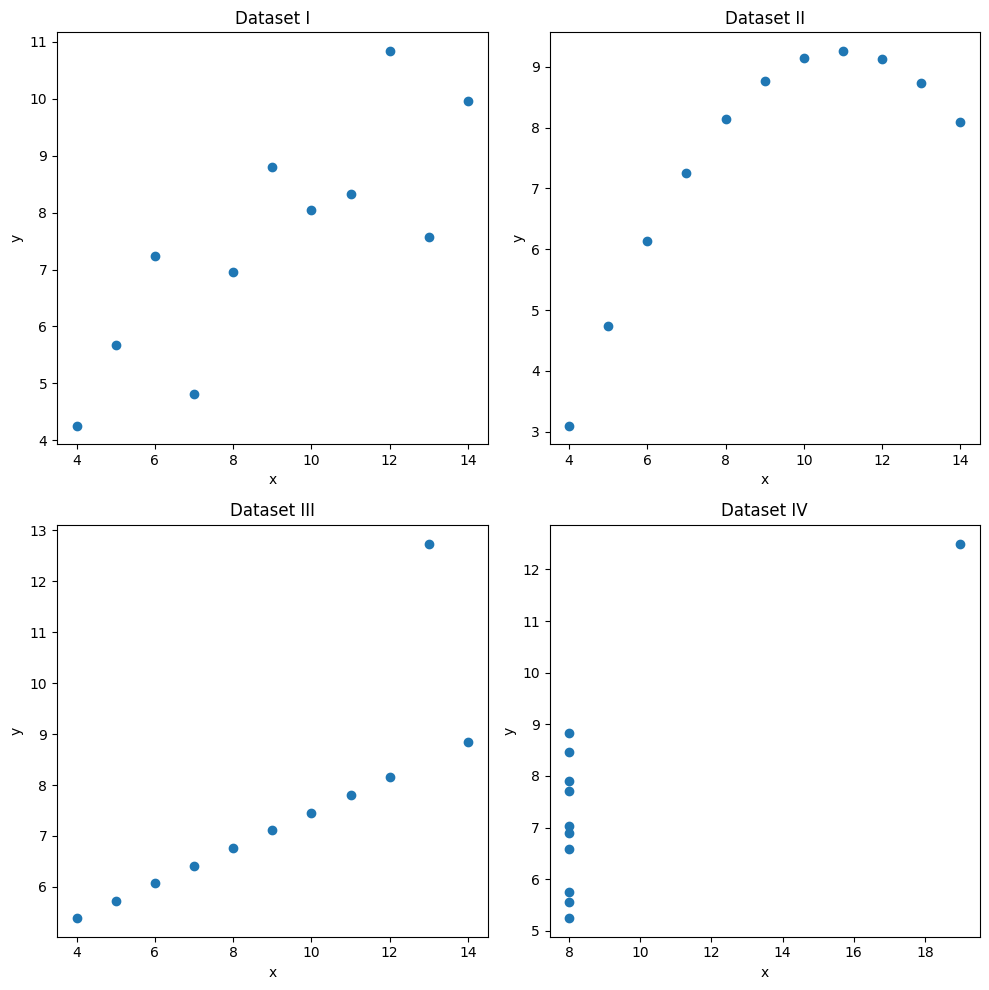

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    subset = df[df['dataset'] == dataset]
    ax = axs[i // 2][i % 2]
    ax.scatter(subset['x'], subset['y'])
    ax.set_title(f"Dataset {dataset}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

# Problem 2

Подсказка 1: рассмотрите решение задачи МНК для этих матриц (центрированной по признакам и со столбцом единиц), покажите, что они почти одинаковы.

Подсказка 2: запишите $X^T X$ во втором случае в виде блочной матрицы и посчитайте обратную, докажите, что в верхнем правом блоке получится то же самое.

In [5]:
rows, columns = 5, 3

A = np.random.random(size=(rows, columns))
A_ext = np.concatenate((A, np.ones((rows, 1))), axis=1)
A_mean = A - np.mean(A, axis=0)

B_mean = np.linalg.inv(A_mean.T @ A_mean)
B_ext = np.linalg.inv(A_ext.T @ A_ext)

B_mean, B_ext[:columns, :columns]

(array([[10.13040505,  5.89146125, -2.51477452],
        [ 5.89146125,  6.25502349, -1.18031544],
        [-2.51477452, -1.18031544,  2.23768053]]),
 array([[10.13040505,  5.89146125, -2.51477452],
        [ 5.89146125,  6.25502349, -1.18031544],
        [-2.51477452, -1.18031544,  2.23768053]]))

# Problem 3

Рассмотрим систему $ X w = y $, где $ X \in \mathbb{R}^{m \times n} $, $ m < n $, $ \operatorname{rank} X = m $

Рассмотрим частное решение $ w_{ln} = X^T \left(X X^T\right)^{-1} y \: $ ($ X X^T $ обратима, так как $ X $ имеет полный ранг). Покажем, что это решение минимизирует $ l_2 $-норму весов $ ||w|| $. 

Пусть $ X w = y $, тогда $ X \left(w - w_{ln}\right) = 0 $ и $ \left(w - w_{ln}\right)^T w_{ln} = \left(w - w_{ln}\right)^T X^T \left(X X^T\right)^{-1} y = \left(X \left(w - w_{ln}\right)\right)^T \left(X X^T\right)^{-1} y = 0 $, т. е. $ \left(w - w_{ln}\right) \perp w_{ln} $, тогда $ ||w||^2 = ||w_{ln} + w - w_{ln}||^2 = ||w_{ln}||^2 + ||w - w_{ln}||^2 \geq ||w_{ln}||^2 $, т. е. $ w_{ln} $ имеет минимальную норму среди всех решений.

# Problem 4

1. $ \frac{1}{l} || X - \tilde{X} ||^2 = \frac{1}{l} || V \sqrt{\Lambda} U^T - V \sqrt{\tilde{\Lambda}} U^T ||^2 = \frac{1}{l} || V \left(\sqrt{\Lambda} - \sqrt{\tilde{\Lambda}}\right) U^T ||^2 = \frac{1}{l} \lambda_{\tilde{F} + 1} \neq \sum\limits_{i = \tilde{F} + 1}^{F} \lambda_i $. Для нормы Фробениуса это правда (проверяется легко).

2. Покажем, что $ \mathbf{u}_1' = \arg \max_{||\mathbf{u}|| = 1} ||X \mathbf{u}||^2 $ - сингулярный вектор, и что $ ||X \mathbf{u}_1'|| $ - наибольшее сингулярное значение $ X $.
Пусть $ \mathbf{u}_1, \mathbf{u}_2, \dots, \mathbf{u}_n $ - ортонормированные собственные векторы $ X^T X $ с собственными значениями $ \sigma_1^2 \geq \dots \geq \sigma_n^2 $. Для любого $ \mathbf{u} \in \mathbb{R}^n : ||\mathbf{u}|| = 1 $ пусть $ \mathbf{u} = \sum_{i = 1}^n c_i \mathbf{u}_i $, $ \sum_{i = 1}^n c_i^2 = 1 $. $ ||X \mathbf{u}||^2 = \left(X \mathbf{u}\right)^T \left(X \mathbf{u}\right) = \mathbf{u}^T \left(X^T X\right) \mathbf{u} = \left(\sum_{j = 1}^n c_j \mathbf{u}_j\right)^T \left(X^T X\right) \left(\sum_{i = 1}^n c_i \mathbf{u}_i\right) = \left(\sum_{j = 1}^n c_j \mathbf{u}_j\right)^T \left(\sum_{i = 1}^n c_i \sigma_i^2 \mathbf{u}_i\right) = \sum_{j = 1}^n \sum_{i = 1}^n c_i c_j \sigma_i^2 \mathbf{u}_j^T \mathbf{u}_i = \sum_{i = 1}^n c_i^2 \sigma_i^2 $. Тогда $ ||X \mathbf{u}||^2 = \sum_{i = 1}^n c_i^2 \sigma_i^2 \leq \sigma_1^2 $, $ \forall \mathbf{u} \in \mathbb{R}^n : ||\mathbf{u}|| = 1 $. На векторе $ \mathbf{u}_1 $, $ ||X \mathbf{u}_1||^2 = \sigma_1^2 $. $ \mathbf{u}_1 $ - собственный вектор $ X^T X $, т. е. сингулярный вектор $ X $. При этом $ \sigma_1^2 $ - наибольшее собственное значение $ X^T X $, т. е. наибольшее сингулярное значение $ X $.

/tmp/ipykernel_24364/3517293678.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, N)


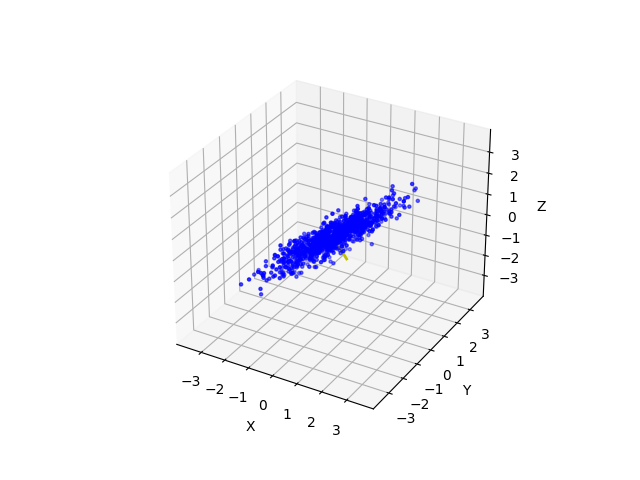

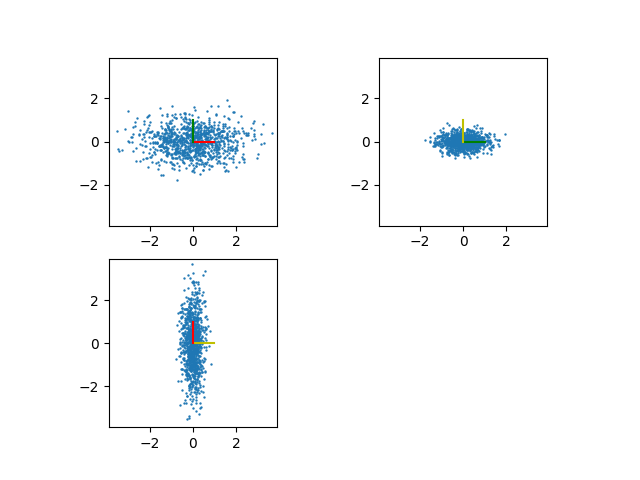

In [6]:
%matplotlib ipympl

A = np.random.random(size=(3, 3))
A = np.triu(A) + np.triu(A, 1).T

N = 1000
mean = np.zeros(3)
cov = A
X = np.random.multivariate_normal(mean, cov, N)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

pca = PCA(n_components=3)
pca.fit(X)
a, b, c = pca.components_

ax.plot([0, a[0]], [0, a[1]], [0, a[2]], c='r', linewidth=2)
ax.plot([0, b[0]], [0, b[1]], [0, b[2]], c='g', linewidth=2)
ax.plot([0, c[0]], [0, c[1]], [0, c[2]], c='y', linewidth=2)

ax.set_aspect('equal', adjustable='box')

lim = 1.5 * np.max(np.abs(X))

ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_zlim(-lim, lim)

plt.show()

fig, ax = plt.subplots(2, 2)

AB = np.array([a, b, np.cross(a, b)])
BC = np.array([b, c, np.cross(b, c)])
CA = np.array([c, a, np.cross(c, a)])

X_ab = X @ AB.T
ax[0, 0].scatter(X_ab[:, 0], X_ab[:, 1], s=0.5)

ax[0, 0].plot([0, 1], [0, 0], c='r')
ax[0, 0].plot([0, 0], [0, 1], c='g')

ax[0, 0].set_aspect('equal', adjustable='box')

ax[0, 0].set_xlim(-lim, lim)
ax[0, 0].set_ylim(-lim, lim)

X_bc = X @ BC.T
ax[0, 1].scatter(X_bc[:, 0], X_bc[:, 1], s=0.5)

ax[0, 1].plot([0, 1], [0, 0], c='g')
ax[0, 1].plot([0, 0], [0, 1], c='y')

ax[0, 1].set_aspect('equal', adjustable='box')

ax[0, 1].set_xlim(-lim, lim)
ax[0, 1].set_ylim(-lim, lim)

X_ca = X @ CA.T
ax[1, 0].scatter(X_ca[:, 0], X_ca[:, 1], s=0.5)

ax[1, 0].plot([0, 1], [0, 0], c='y')
ax[1, 0].plot([0, 0], [0, 1], c='r')

ax[1, 0].set_aspect('equal', adjustable='box')

ax[1, 0].set_xlim(-lim, lim)
ax[1, 0].set_ylim(-lim, lim)

ax[1, 1].set_visible(False)

plt.show()

# Problem 5

1. Сразу следует из следующего пункта (сумма квадратов расстояний минимальна вдоль главной оси инерции с максимальным моментом).

2. Задача нахождения главных моментов инерции эквивалентна отысканию собственных значений матрицы $ I_{ij} = \sum\limits_{k=1}^N ||r_k||^2 \delta_{ij} - X_{ki} X_{kj} $, $ \mathbf{I} = \sum\limits_{k=1}^N ||r_k||^2 \mathbf{E} - \mathbf{X}^T \mathbf{X} = ||\mathbf{X}||_F^2 \mathbf{E} - \mathbf{X}^T \mathbf{X} $. Но собственные значения этой матрицы на $ ||\mathbf{X}||_F^2 $ отличаются от собственных значений матрицы $ \mathbf{X}^T \mathbf{X} $, которые в свою очередь являются квадратами сингулярных значений $ \mathbf{X} $.

In [7]:
H_8 = np.array([[1 / (i + j + 1) for i in range(8)] for j in range(8)])
H_10 = np.array([[1 / (i + j + 1) for i in range(10)] for j in range(10)])

b_8 = np.eye(8)[0]
b_10 = np.eye(10)[0]

x_8 = np.linalg.solve(H_8, b_8)
x_10 = np.linalg.solve(H_10, b_10)

eps = 10 ** (-8)

U, D, V = np.linalg.svd(H_8)
x_8_t = np.sum(np.array([D[i] ** (-1) * V[i] * (U[i].T @ b_8) for i in range(np.sum(D > eps))]), axis=0)

U, D, V = np.linalg.svd(H_10)
x_10_t = np.sum(np.array([D[i] ** (-1) * V[i] * (U[i].T @ b_10) for i in range(np.sum(D > eps))]), axis=0)

np.linalg.norm(x_8 - x_8_t), np.linalg.norm(x_10 - x_10_t)

(9074349.145230541, 15401870.118731849)

# Problem 6*

1. $ \left|\left|\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \vec{\mu}^{T}\right)\right|\right|_F = \operatorname{tr} \left(\left(\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \vec{\mu}^{T}\right)\right)^T \left(\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \vec{\mu}^{T}\right)\right)\right) = \operatorname{tr} \left(\left(\mathbf{X}_{2}^T-\mathbf{R}^T \mathbf{X}_{1}^T + \vec{\mu} \cdot \mathbf{1}^T\right) \left(\mathbf{X}_{2}-\mathbf{X}_{1} \mathbf{R}+\mathbf{1} \cdot \vec{\mu}^{T}\right)\right) = $ $ = \operatorname{tr} \left(\mathbf{X}_{2}^T \mathbf{X}_{2} - \mathbf{X}_{2}^T \mathbf{X}_{1} \mathbf{R} + \mathbf{X}_2^T \mathbf{1} \cdot \vec{\mu}^{T} - \mathbf{R}^T \mathbf{X}_{1}^T \mathbf{X}_{2} + \mathbf{R}^T \mathbf{X}_{1}^T \mathbf{X}_{1} \mathbf{R} - \mathbf{R}^T \mathbf{X}_{1}^T \mathbf{1} \cdot \vec{\mu}^{T} + \vec{\mu} \cdot \mathbf{1}^T \mathbf{X}_2 - \vec{\mu} \cdot \mathbf{1}^T \mathbf{X}_{1} \mathbf{R} + \vec{\mu} \cdot \mathbf{1}^T \mathbf{1} \cdot \vec{\mu}^{T}\right) = $ $ = \operatorname{tr} \left(\mathbf{X}_1^T \mathbf{X}_1\right) + \operatorname{tr} \left(\mathbf{X}_2^T \mathbf{X}_2\right) + n \vec{\mu}^T \vec{\mu} - 2 \operatorname{tr} \left(\mathbf{X}_{2}^T \mathbf{X}_{1} \mathbf{R}\right) + \operatorname{tr} \left(\mathbf{X}_2^T \mathbf{1} \cdot \vec{\mu}^{T}\right) - \operatorname{tr} \left(\mathbf{R}^T \mathbf{X}_{1}^T \mathbf{1} \cdot \vec{\mu}^{T}\right) + \operatorname{tr} \left(\vec{\mu} \cdot \mathbf{1}^T \mathbf{X}_2\right) - \operatorname{tr} \left(\vec{\mu} \cdot \mathbf{1}^T \mathbf{X}_{1} \mathbf{R}\right) = $ $ = \operatorname{tr} \left(\mathbf{X}_1^T \mathbf{X}_1\right) + \operatorname{tr} \left(\mathbf{X}_2^T \mathbf{X}_2\right) + n \vec{\mu}^T \vec{\mu} - 2 \operatorname{tr} \left(\mathbf{X}_{2}^T \mathbf{X}_{1} \mathbf{R}\right) + n \vec{\mu}^{T} \cdot \bar{x}_2 - n \vec{\mu}^{T} \cdot \mathbf{R}^T \bar{x}_{1} + n \bar{x}_2^T \cdot \vec{\mu} - n \bar{x}_{1}^T \mathbf{R} \vec{\mu} = $ $ = n \vec{\mu}^T \left(\vec{\mu} + \bar{x}_2 - \mathbf{R}^T \bar{x}_{1}\right) + \operatorname{tr} \left(\mathbf{X}_1^T \mathbf{X}_1\right) + \operatorname{tr} \left(\mathbf{X}_2^T \mathbf{X}_2\right) - 2 \operatorname{tr} \left(\mathbf{X}_{2}^T \mathbf{X}_{1} \mathbf{R}\right) + n \bar{x}_2^T \cdot \vec{\mu} - n \bar{x}_{1}^T \mathbf{R} \vec{\mu} $
2. $ \partial_{\vec{\mu}^T} \left|\left|\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \vec{\mu}^{T}\right)\right|\right|_F = n \mathbf{E} \left(\vec{\mu} + \bar{x}_2 - \mathbf{R}^T \bar{x}_{1}\right) = 0 \Rightarrow \vec{\mu} = - \bar{x}_2 + \mathbf{R}^T \bar{x}_{1} $
3. Тогда на $ \vec{\mu} $ $ \left|\left|\mathbf{X}_{2}-\left(\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \vec{\mu}^{T}\right)\right|\right|_F = \operatorname{tr} \left(\left(\mathbf{X}_{2}-\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \bar{x}_2^{T} + \mathbf{1} \cdot \bar{x}_{1}^{T} \mathbf{R}\right)^T \left(\mathbf{X}_{2}-\mathbf{X}_{1} \mathbf{R}-\mathbf{1} \cdot \bar{x}_2^{T} + \mathbf{1} \cdot \bar{x}_{1}^{T} \mathbf{R}\right)\right) = \operatorname{tr} \left(\left(\bar{\mathbf{X}}_{2} - \bar{\mathbf{X}}_{1} \mathbf{R}\right)^T \left(\bar{\mathbf{X}}_{2} - \bar{\mathbf{X}}_{1} \mathbf{R}\right)\right) = $ $ = \operatorname{tr} \left(\bar{\mathbf{X}}_{1}^T \bar{\mathbf{X}}_{1}\right) + \operatorname{tr} \left(\bar{\mathbf{X}}_{2}^T \bar{\mathbf{X}}_{2}\right) - 2 \operatorname{tr} \left(\bar{\mathbf{X}}_{2}^T \bar{\mathbf{X}}_{1} \mathbf{R}\right) $. Обозначим $ \mathbf{S} = \bar{\mathbf{X}}_{1}^T \bar{\mathbf{X}}_{2} $. $\mathbf{S}=\left(\begin{array}{ll}s_{11} & s_{12} \\ s_{21} & s_{22}\end{array}\right)$, $\mathbf{R}=\left(\begin{array}{cc}\cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{array}\right) $. $ \operatorname{tr} \left(\mathbf{S}^T \mathbf{R}\right) = s_{11} \cos{\theta} + s_{21} \sin{\theta} - s_{12} \sin{\theta} + s_{22} \cos{\theta} $. $ \partial_\theta \operatorname{tr} \left(\mathbf{S}^T \mathbf{R}\right) = - s_{11} \sin{\theta} + s_{21} \cos{\theta} - s_{12} \cos{\theta} - s_{22} \sin{\theta} = 0 $
4. Последнее равенство эквивалентно $ - s_{11} \sin{\theta} + s_{21} \cos{\theta} = s_{12} \cos{\theta} + s_{22} \sin{\theta} $, т. е. матрица $ \mathbf{S}^T \mathbf{R} $ симметрична, т. е. $ \mathbf{S}^T \mathbf{R} = \mathbf{R}^T \mathbf{S} $. Распишем сингулярное разложение для матрицы $ \mathbf{S} $, $ \mathbf{S} = \mathbf{U} \mathbf{D} \mathbf{V}^T $, тогда $ \mathbf{V} \mathbf{D} \mathbf{U}^T \mathbf{R} = \mathbf{R}^T \mathbf{U} \mathbf{D} \mathbf{V}^T $. Но сингулярное разложение для матриц $ \mathbf{S}^T \mathbf{R} $ и $ \mathbf{R}^T \mathbf{S} $ единственно, значит $ \mathbf{U}^T \mathbf{R} = \mathbf{V}^T $, значит $ \mathbf{R} = \mathbf{U} \mathbf{V}^T $.

In [8]:
def show_old(X1, Y1, X2, Y2):
    fig, ax = plt.subplots(1, 1)
    
    ax.plot(X1, Y1)
    ax.plot(X2, Y2)

    ax.set_aspect('equal')

    plt.show()

In [9]:
def show_new(X1, Y1, X2, Y2):
    x1 = np.array([np.mean(X1), np.mean(Y1)])
    x2 = np.array([np.mean(X2), np.mean(Y2)])

    XY1 = np.vstack((X1, Y1)).T
    XY2 = np.vstack((X2, Y2)).T
    
    Xnew1 = X1 - x1[0]
    Ynew1 = Y1 - x1[1]
    Xnew2 = X2 - x2[0]
    Ynew2 = Y2 - x2[1]
    
    a = np.vstack((Xnew1, Ynew1)).T
    b = np.vstack((Xnew2, Ynew2)).T
    
    U, D, V = np.linalg.svd(a.T @ b)
    R = U @ V
    mu = -x2 + R.T @ x1
    
    new1 = XY1 @ R - mu

    fig, ax = plt.subplots(1, 1)
    
    ax.plot(new1[:, 0], new1[:, 1])
    ax.plot(X2, Y2)

    ax.axis('scaled')
    
    plt.show()

In [10]:
X1 = np.array([0.0, 1.0, 1.0, 0.0, 0.0])
Y1 = np.array([0.0, 0.0, 1.0, 1.0, 0.0])
X2 = np.array([1.5, 1.5 + 2 ** (-0.5), 1.5, 1.5 - 2 ** (-0.5), 1.5])
Y2 = np.array([1.5 - 2 ** (-0.5), 1.5, 1.5 + 2 ** (-0.5), 1.5, 1.5 - 2 ** (-0.5)])

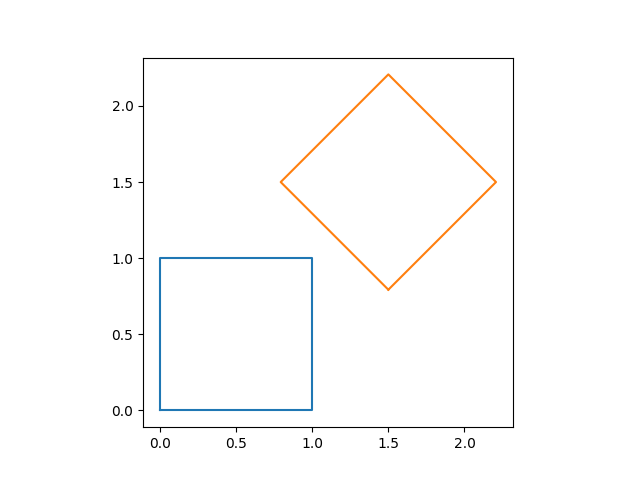

In [11]:
show_old(X1, Y1, X2, Y2)

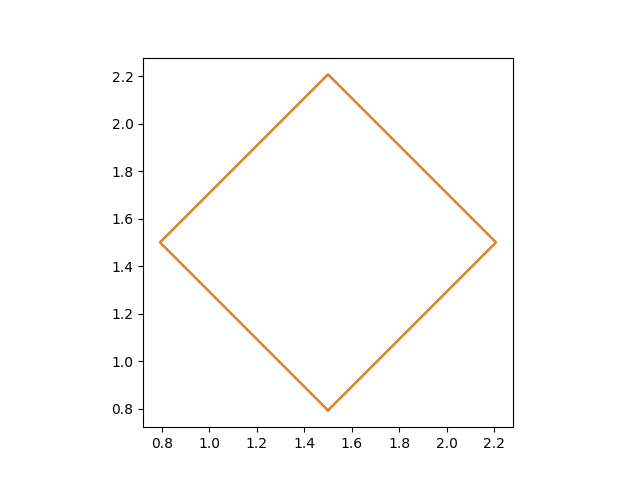

In [12]:
show_new(X1, Y1, X2, Y2)

In [13]:
X1 += np.random.uniform(-0.1, 0.1, size=5)
Y1 += np.random.uniform(-0.1, 0.1, size=5)

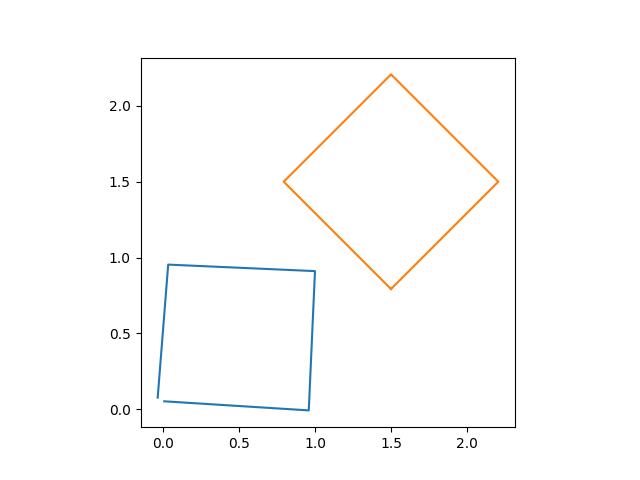

In [14]:
show_old(X1, Y1, X2, Y2)

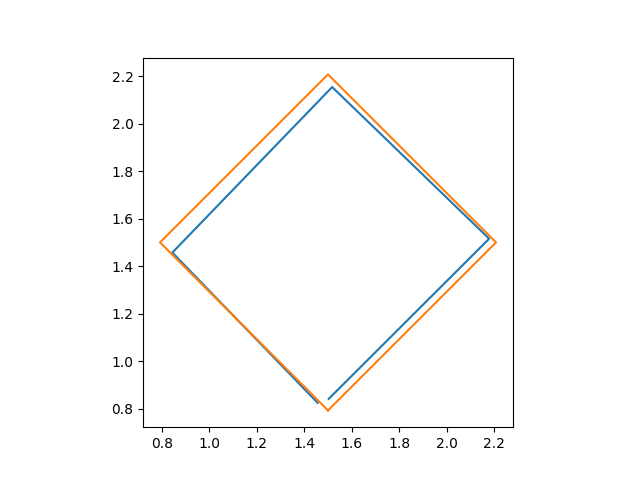

In [15]:
show_new(X1, Y1, X2, Y2)

In [16]:
X2 = np.array([1.0, 2.0, 3.0, 5.0, 1.0])
Y2 = np.array([2.0, 1.0, 2.0, 5.0, 2.0])

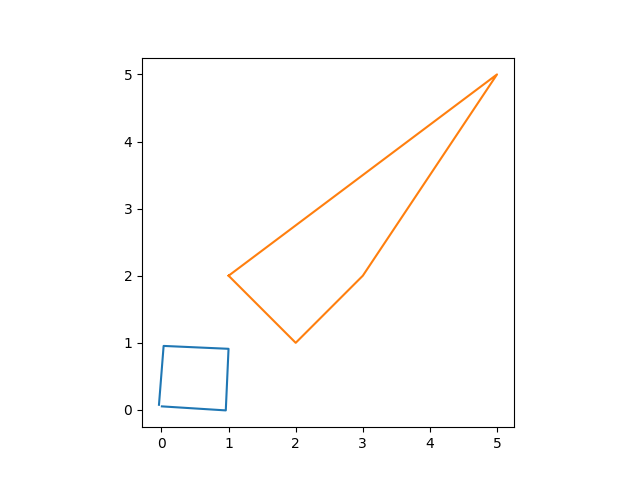

In [17]:
show_old(X1, Y1, X2, Y2)

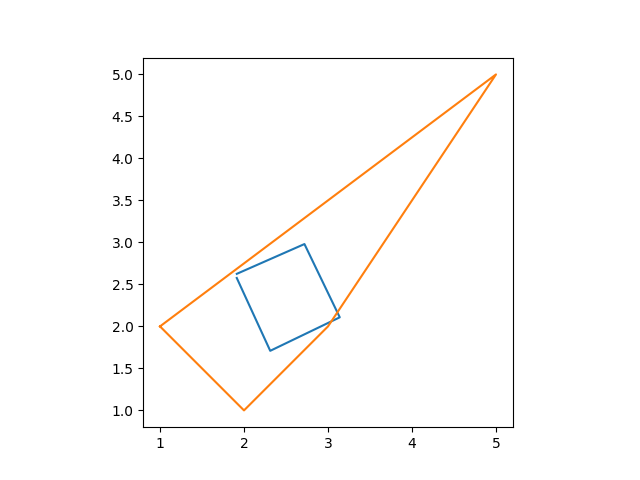

In [18]:
show_new(X1, Y1, X2, Y2)